In [2]:
import geopandas as gpd
import os
import glob
import shutil

In [6]:
data_folder = '/mnt/c/Users/Travis/Downloads/meeting_data/'


folders = glob.glob(os.path.join(data_folder, '*'))

all_dates = []

for i in folders:
    data = glob.glob(os.path.join(i, '*.tif'))

    for x in data:
        all_dates.append(os.path.basename(x).replace('.tif', ''))

# all scan dates that were available from the 20 randomly selected scans
all_dates = set(all_dates)

In [20]:
## Create empty shapefiles

# output_folder = '/mnt/c/Users/Travis/Desktop/phenome_force/'

# template_folder = '/mnt/c/Users/Travis/Desktop/template_folder/'
# template_files = glob.glob(os.path.join(template_folder, '*'))

# for x in all_dates:
#     for i in template_files:
#         shutil.copyfile(i, os.path.join(output_folder, os.path.basename(i).replace('template', x)))


In [4]:
# read in validation data

validation_data = gpd.read_file('final_flir_validation_hud.geojson')



In [5]:
validation_data.head()

,id,scan,layer,path,geometry
0,None,2020-07-31,2020-07-31,C:/Users/Travis/Desktop/phenome_force/2020-07-...,"MULTIPOLYGON (((-111.97483 33.07631, -111.9748..."
1,None,2020-07-31,2020-07-31,C:/Users/Travis/Desktop/phenome_force/2020-07-...,"MULTIPOLYGON (((-111.97483 33.07631, -111.9748..."
2,None,2020-07-31,2020-07-31,C:/Users/Travis/Desktop/phenome_force/2020-07-...,"MULTIPOLYGON (((-111.97483 33.07630, -111.9748..."
3,None,2020-07-31,2020-07-31,C:/Users/Travis/Desktop/phenome_force/2020-07-...,"MULTIPOLYGON (((-111.97486 33.07610, -111.9748..."
4,None,2020-07-31,2020-07-31,C:/Users/Travis/Desktop/phenome_force/2020-07-...,"MULTIPOLYGON (((-111.97486 33.07610, -111.9748..."


In [8]:
# Many usable scan dates did we have compared ot total?

validation_dates = validation_data['scan'].unique()

print(f'Total number of scans: {len(all_dates)}, usable dates = {len(validation_dates)}, total observations = {len(validation_data)}')

Total number of scans: 26, usable dates = 18, total observations = 712


<AxesSubplot:title={'center':'Plants Outlined by Day'}>

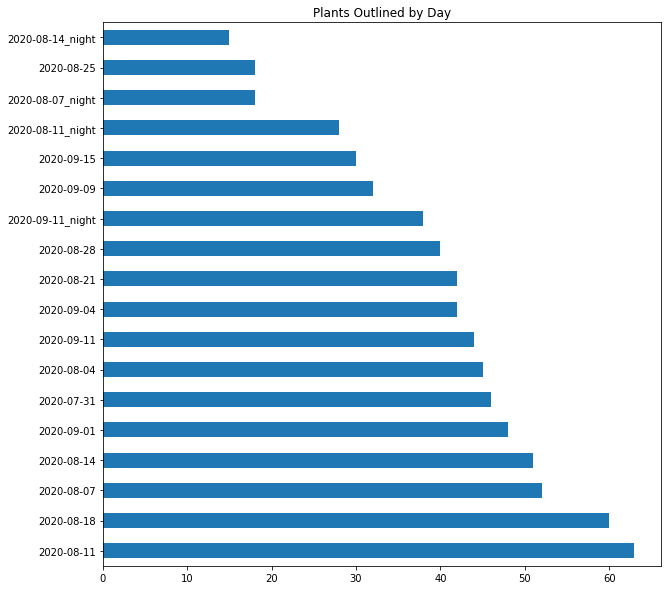

In [12]:
# What dates had the most usable data?

validation_data.scan.value_counts().plot.barh(title = 'Plants Outlined by Day', y = 'Number of Plants Outlined', x = 'Scan Date', figsize = (10,10))
